# ===============One way Anova Analysis=================

# Abstract
This article presents the statistical analysis of the deposit activities in each of the account types of a leading bank in Nigeria. The mean effect of these account types on the bank was determined using analysis of variance (ANOVA). Further test which include the Tukey's simultaneous test for differences of means was also conducted.

# Import Required Library

In [54]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data File

In [55]:
df=pd.read_excel("bank_deposits_d1.xlsx",'Sheet1')
#df=df.replace(np.nan, 0)

# Top - 5 Observation 

In [92]:
df.head(5)

,Account_Type_1_Savings,Account_Type_2_Current,Account_Type_3 _Corporate,Account_Type_4,Account_Type_5,Account_Type_6
0,20000,735000.0,500000.0,18500.0,15000.0,20000.0
1,22000,850000.0,280000.0,50000.0,25000.0,15000.0
2,46000,130000.0,700000.0,40000.0,8000.0,80000.0
3,18000,350000.0,332000.0,15000.0,78000.0,17000.0
4,7500,428000.0,200000.0,20000.0,40000.0,NaN


# Reshape the Dataframe Suitable For StatsModels Package

In [58]:
df_melt1 = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Account_Type_1_Savings', 'Account_Type_2_Current', 'Account_Type_3 _Corporate', 'Account_Type_4','Account_Type_5','Account_Type_6'])

In [59]:
df_melt1.head()

,index,variable,value
0,0,Account_Type_1_Savings,20000.0
1,1,Account_Type_1_Savings,22000.0
2,2,Account_Type_1_Savings,46000.0
3,3,Account_Type_1_Savings,18000.0
4,4,Account_Type_1_Savings,7500.0


# Rename Column Names

In [60]:
df_melt1.columns = ['index', 'treatments', 'value']
df_melt1.head()

,index,treatments,value
0,0,Account_Type_1_Savings,20000.0
1,1,Account_Type_1_Savings,22000.0
2,2,Account_Type_1_Savings,46000.0
3,3,Account_Type_1_Savings,18000.0
4,4,Account_Type_1_Savings,7500.0


# Create a boxplot to see the data distribution by treatments.

## Using boxplot, we can easily detect the differences between different treatments

### the boxplot representing the mean amount deposited in the various account types is displayed

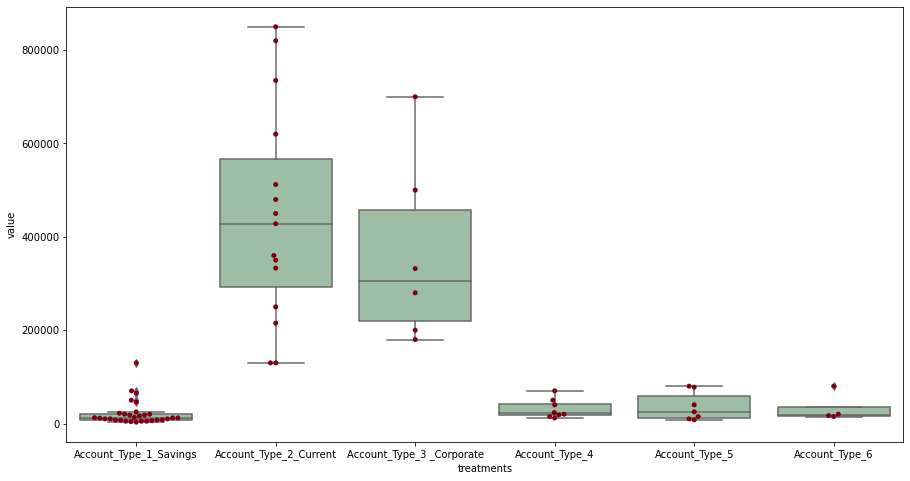

In [61]:
import matplotlib.pyplot as plt
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = "treatments", y = "value", ax=ax, data=df_melt1,color='#99c2a2')
sns.swarmplot(x="treatments", y="value",ax=ax ,data=df_melt1, color='#7d0013')

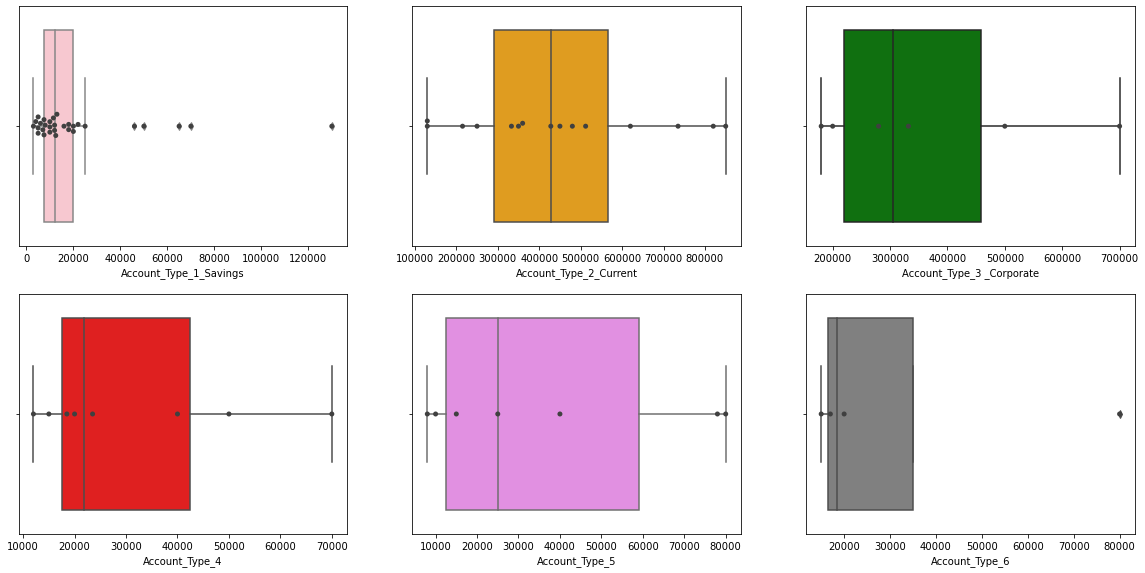

In [106]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=df['Account_Type_1_Savings'],color='Pink')
sns.swarmplot(x=df['Account_Type_1_Savings'], color=".25")

plt.subplot(3,3,2)
sns.boxplot(x=df['Account_Type_2_Current'],color='Orange')
sns.swarmplot(x=df['Account_Type_2_Current'], color=".25")

plt.subplot(3,3,3)
sns.boxplot(x=df['Account_Type_3 _Corporate'],color="Green")
sns.swarmplot(x=df['Account_Type_3 _Corporate'], color=".25")

plt.subplot(3,3,4)
sns.boxplot(x=df['Account_Type_4'],color='Red')
sns.swarmplot(x=df['Account_Type_4'], color=".25")

plt.subplot(3,3,5)
sns.boxplot(x=df['Account_Type_5'],color='violet')
sns.swarmplot(x=df['Account_Type_5'], color=".25")

plt.subplot(3,3,6)
sns.boxplot(x=df['Account_Type_6'],color='grey')
sns.swarmplot(x=df['Account_Type_6'], color=".25")

plt.show()

### Boxplot Structure
1)Bottom black horizontal line of Pink box plot is minimum value.

2)First black horizontal line of rectangle shape of Pink box plot is First quartile [Q1] or 25%

3)Second black horizontal line of rectangle shape of Pink box plot is Second quartile [Q2]o r 50% or median

4)Third black horizontal line of rectangle shape of Pink box plot is third quartile [Q3] or 75%

5)Top black horizontal line of rectangle shape of Pink box plot is maximum value.

6)Values which are above Top Black Horizontal line of rectangle shape of Pink box are Outliers

Observations :

Account_Type_1_Savings:You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1 with outliers

Account_Type_2_Current: You’ll notice here that the distance between Q1 and Q2 and Q2 and Q3 is almost equal i.e.: Q3-Q2=Q2-Q1

Account_Type_3 _Corporate :You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1 

Account_Type_4 :You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1

Account_Type_5 : You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1

Account_Type_6 : You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1 with outliers

# Summary Statistics

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Type_1_Savings,30.0,21633.333333,26794.857115,3000.0,7500.0,12000.0,20000.0,130000.0
Account_Type_2_Current,15.0,444200.000000,230459.540918,130000.0,291500.0,428000.0,566000.0,850000.0
Account_Type_3 _Corporate,6.0,365333.333333,200106.638237,180000.0,220000.0,306000.0,458000.0,700000.0
Account_Type_4,8.0,31125.000000,20400.892838,12000.0,17625.0,21750.0,42500.0,70000.0
Account_Type_5,7.0,36571.428571,30918.479603,8000.0,12500.0,25000.0,59000.0,80000.0
Account_Type_6,4.0,33000.000000,31400.636936,15000.0,16500.0,18500.0,35000.0,80000.0


In [94]:
print("MEAN :",df.mean())
print("Median :",df.median())
#print("Mode :",df.mode().T)
print("difference :",df.mean()-df.median())

MEAN : Account_Type_1_Savings        21633.333333
Account_Type_2_Current       444200.000000
Account_Type_3 _Corporate    365333.333333
Account_Type_4                31125.000000
Account_Type_5                36571.428571
Account_Type_6                33000.000000
dtype: float64
Median : Account_Type_1_Savings        12000.0
Account_Type_2_Current       428000.0
Account_Type_3 _Corporate    306000.0
Account_Type_4                21750.0
Account_Type_5                25000.0
Account_Type_6                18500.0
dtype: float64
difference : Account_Type_1_Savings        9633.333333
Account_Type_2_Current       16200.000000
Account_Type_3 _Corporate    59333.333333
Account_Type_4                9375.000000
Account_Type_5               11571.428571
Account_Type_6               14500.000000
dtype: float64


As we notice mean > median in all Account types,its tells that the value of skweness for skewed distribution is greater than Zero. i.e data is +ve Skewed

### Let us use seaborn distplot to analyze the distribution of our columns and see the skewness in attributes

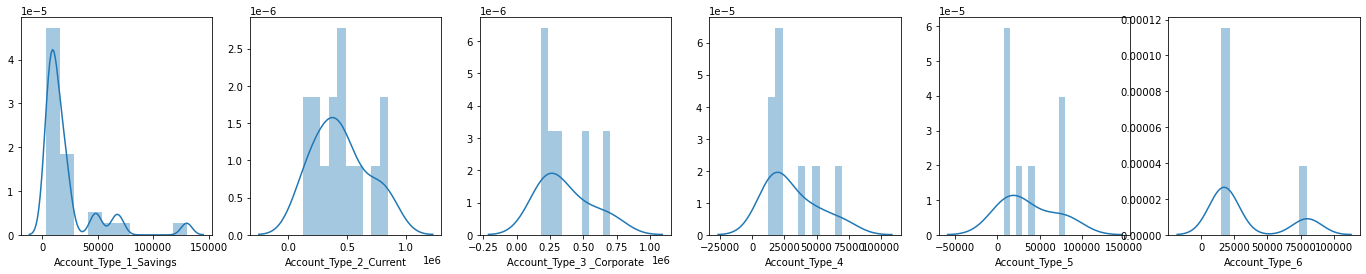

In [101]:
f,ax=plt.subplots(1,6,figsize=(24,4))
vis1=sns.distplot(df['Account_Type_1_Savings'],bins=10,ax=ax[0])
vis2=sns.distplot(df['Account_Type_2_Current'],bins=10,ax=ax[1])
vis3=sns.distplot(df['Account_Type_3 _Corporate'],bins=10,ax=ax[2])
vis4=sns.distplot(df['Account_Type_4'],bins=10,ax=ax[3])
vis5=sns.distplot(df['Account_Type_5'],bins=10,ax=ax[4])
vis6=sns.distplot(df['Account_Type_6'],bins=10,ax=ax[5])

### We can also check Skewness by using Skew() inbuilt function

In [102]:
skewValue = df.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  Account_Type_1_Savings       2.793323
Account_Type_2_Current       0.444852
Account_Type_3 _Corporate    1.062614
Account_Type_4               1.147541
Account_Type_5               0.784567
Account_Type_6               1.974482
dtype: float64


Since our data is positively skewed here, it means that it has a higher number of data points having low values

### ANOVA using Python

### What is ANOVA (ANalysis Of VAriance)?

1)ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)

2)Groups mean differences inferred by analyzing variances

3)ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F test is also called omnibus test as it tests non-specific null hypothesis i.e. all group means are equal

4)Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)

5)If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA

Note: In ANOVA, group, factors, and independent variables are similar terms

### ANOVA Hypotheses

Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp

Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal

### ANOVA Assumptions

Residuals (experimental error) are normally distributed (Shapiro-Wilks Test)

Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test)

Observations are sampled independently from each other

###  How ANOVA works?

Check sample sizes: equal number of observation in each group

Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group

Calculate Mean Square error (MSE) (SS error/df of residuals)

Calculate F value (MS of group/MSE)

### One-way (one factor) ANOVA with Python

Here, there are four treatments

(Account_Type_1_Savings,Account_Type_2_Current,Account_Type_3 _Corporate,Account_Type_4,Account_Type_5,Account_Type_6 which are groups for ANOVA analysis.

Treatments are independent variable and termed as factor. As there are four types of treatments, treatment factor has four levels.

For this experimental design, 

there is only factor (treatments) or independent variable to evaluate, and therefore, one-way ANOVA method is suitable for analysis.

### Stats f_oneway functions takes the groups as input & returns ANOVA F-value and p-value

In [113]:
data = [df[col].dropna() for col in df]

In [114]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(*data)

In [115]:
print('F-Vaue :',fvalue.round(decimals=4), 'P-value :', pvalue.round(decimals=4))

F-Vaue : 30.5101 P-value : 0.0


###  For getting  ANOVA table Import OLS from Statsmodel 

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

###  Ordinary Least Squares (OLS) model

In [72]:
lm=ols('value~C(treatments)',data=df_melt1).fit()
Anova_table=sm.stats.anova_lm(lm)
res = lm.resid # residuals

###  Print  Output (ANOVA F and p-value)

In [73]:
print(Anova_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(treatments)   5.0  2.326883e+12  4.653765e+11  30.510122  9.975028e-16
Residual       64.0  9.762038e+11  1.525318e+10        NaN           NaN


In [36]:
print(res)

0      -1633.333333
1        366.666667
2      24366.666667
3      -3633.333333
4     -14133.333333
           ...     
175    -4400.000000
176    -4400.000000
177    -4400.000000
178    -4400.000000
179    -4400.000000
Length: 180, dtype: float64


### Note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
### (typ=1/2/3 parameter) will produce similar results.

# Interpretation

### The p-value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

## Important Note :

###  If you have unbalanced (unequal sample size for each group) data, you can perform similar steps as described for one-way ANOVA with balanced design (equal sample size for each group).

###  From ANOVA Analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

Tukey’s HSD test accounts for multiple comparisons and corrects for family-wise error rate (FWER) (inflated type I error)

# Import pairwise_tukeyhsd

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
df_melt1=df_melt1.replace(np.nan, 0)

In [15]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_melt1['value'],
                          groups=df_melt1['treatments'],
                          alpha=0.05)

In [16]:
print(tukey)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
          group1                    group2            meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------------------------------------------
   Account_Type_1_Savings    Account_Type_2_Current  200466.6667  0.001  100938.2307  299995.1027   True
   Account_Type_1_Savings Account_Type_3 _Corporate   51433.3333 0.6495  -48095.1027  150961.7693  False
   Account_Type_1_Savings            Account_Type_4  -13333.3333    0.9 -112861.7693   86195.1027  False
   Account_Type_1_Savings            Account_Type_5     -13100.0    0.9  -112628.436    86428.436  False
   Account_Type_1_Savings           Account_Type_6   -17233.3333    0.9 -116761.7693   82295.1027  False
   Account_Type_2_Current Account_Type_3 _Corporate -149033.3333  0.001 -248561.7693  -49504.8973   True
   Account_Type_2_Current            Account_Type_4    

### Note: (p-adj) - p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

The pairs with p-value that is less than 0.05 are significantly different from each other

Thus, we would conclude that there is a statistically significant difference between

1) i) the means of groups Account_Type_1_Savings and Account_Type_2_Current
   ii)Account_Type_2_Current and Account_Type_3 _Corporate
   iii)Account_Type_2_Current and Account_Type_4
   iv) Account_Type_2_Current and Account_Type_5
   v)Account_Type_2_Current and Account_Type_6
    
 but not a statistically significant difference between the means of groups where p-adj is not less than Alpha (0.05)
 


#### Note: Tukey's HSD test is conservative and increases the critical value to control the experimentwise type I error rate. If you have a large number of comparisons (say > 10 or 20) to make using Tukey's test, there may be chances that you may not get significant results for all or expected pairs. If you are interested in only specific or few comparisons and you won't find significant differences using Tukey's test, you may split the data for specific comparisons or use the t-test

# Holm-Bonferroni Method

## The Holm-Bonferroni method is an alterantive method for Multi-Comparison

In [17]:
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
mod = MultiComparison(df_melt1['value'], df_melt1['treatments'])
comp = mod.allpairtest(stats.ttest_rel, method='Holm')
print(comp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.00, alphacBonf=0.003
          group1                    group2            stat   pval  pval_corr reject
-----------------------------------------------------------------------------------
   Account_Type_1_Savings    Account_Type_2_Current -3.9504 0.0005    0.0055   True
   Account_Type_1_Savings Account_Type_3 _Corporate -1.6757 0.1046    0.4182  False
   Account_Type_1_Savings            Account_Type_4  2.3596 0.0252    0.2097  False
   Account_Type_1_Savings            Account_Type_5  2.3323 0.0268    0.2097  False
   Account_Type_1_Savings           Account_Type_6   3.2926 0.0026    0.0288   True
   Account_Type_2_Current Account_Type_3 _Corporate  3.0649 0.0047    0.0467   True
   Account_Type_2_Current            Account_Type_4  4.3398 0.0002    0.0023   True
   Account_Type_2_Current            Account_Type_5  4.3508 0.0002    0.0023   True
   Account_Type_2_Current           Account_Type_6    4.328 0.0002 

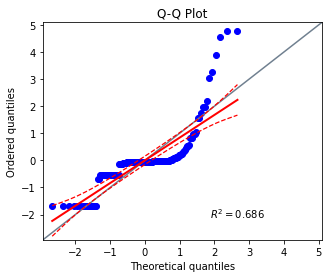

In [37]:
import numpy as np
import pingouin as pg
#np.random.seed(123)
#x = np.random.normal(size=50)
ax = pg.qqplot(res, dist='norm')

## Normality Check using Shapiro test

In [138]:
# dat=np.random.normal(loc=20,scale=5,size=150)
# dat
from scipy.stats import shapiro
normal_data=df_melt1['value'].dropna()
normal_data
stat,pvalue=shapiro(normal_data)

In [145]:
print("Stat :",round(stat,3),"P-value :", round(pvalue,3))

Stat : 0.682 P-value : 0.0


If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.

If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

Observation :

from our observation ,we can conclude that our variable is not normal as we are getting p-value =0.0 which <5% alpha,we reject Null Hypothesis 

## Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

In [163]:
from scipy.stats import levene
#stat,pvalue=shapiro(normal_data)
#stat, p = levene(df['Account_Type_1_Savings'],df['Account_Type_2_Current'])#,Account_Type_3 _Corporate,Account_Type_4,Account_Type_5,Account_Type_6 
stat, pvalue = levene(*data)

In [165]:
print("P-value",round(pvalue,3))

P-value 0.0


Here we can conclude that The small p-value suggests that the populations do not have equal variances.

In [18]:
#conda install -c conda-forge pingouin

In [166]:
# import pingouin as pg
# #dfx = pg.read_dataset('penguins')
# x=df_melt1.pairwise_tukey(dv='value', between='treatments').round(3)
# x